# Bi-gram Model = Names Gen
----

## Load data

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last"  # Options: 'last', 'all', 'last_expr'

In [2]:
data_folder = './data/indian_names/'
with open(data_folder + 'indian_names.csv') as f:
    names = f.read().splitlines()
len(names)

30040

In [3]:
names[:10]

['barjraj',
 'ramdin verma',
 'sharat chandran',
 'birender mandal',
 'amit',
 'kushal',
 'kasid',
 'shiv prakash',
 'vikram singh',
 'sanjay']

In [4]:
import numpy as np

## Bigram Model

In [213]:
allchars = ''.join(sorted(''.join(list(set(''.join(names))))))
allchars 

' abcdefghijklmnopqrstuvwxyz'

In [214]:
d = {}
for word in names[:2]:
    word = '#' + word + '$'
    for w1,w2 in zip(word, word[1:]):
        print(w1, w2)
        # if (w1,w2) not in d:
        #     d[(w1,w2)] = 0
        # d[(w1,w2)] += 1
        d[(w1,w2)] = d.get((w1,w2), 0) + 1
        
d

# b
b a
a r
r j
j r
r a
a j
j $
# r
r a
a m
m d
d i
i n
n  
  v
v e
e r
r m
m a
a $


{('#', 'b'): 1,
 ('b', 'a'): 1,
 ('a', 'r'): 1,
 ('r', 'j'): 1,
 ('j', 'r'): 1,
 ('r', 'a'): 2,
 ('a', 'j'): 1,
 ('j', '$'): 1,
 ('#', 'r'): 1,
 ('a', 'm'): 1,
 ('m', 'd'): 1,
 ('d', 'i'): 1,
 ('i', 'n'): 1,
 ('n', ' '): 1,
 (' ', 'v'): 1,
 ('v', 'e'): 1,
 ('e', 'r'): 1,
 ('r', 'm'): 1,
 ('m', 'a'): 1,
 ('a', '$'): 1}

In [215]:
d = {}
for word in names:
    word = '#' + word + '$'
    for w1,w2 in zip(word, word[1:]):
        d[(w1,w2)] = d.get((w1,w2), 0) + 1
len(d)

634

In [216]:
sd = sorted(d.items() , key=lambda x: -x[1])
sd

[(('a', 'n'), 8297),
 (('a', '$'), 7647),
 (('s', 'h'), 7013),
 (('a', 'r'), 6873),
 (('h', 'a'), 6517),
 (('m', 'a'), 6417),
 (('#', 's'), 5757),
 (('r', 'a'), 5588),
 (('i', '$'), 5301),
 (('#', 'r'), 3709),
 (('e', 'e'), 3257),
 (('i', 'n'), 3168),
 ((' ', 'k'), 3158),
 (('r', '$'), 3152),
 (('n', 'a'), 3149),
 (('#', 'a'), 3145),
 (('a', 'l'), 3129),
 (('a', 'm'), 3128),
 (('u', 'm'), 2998),
 (('s', 'a'), 2923),
 (('k', 'u'), 2917),
 (('n', 'i'), 2780),
 (('d', 'e'), 2777),
 (('#', 'm'), 2721),
 (('k', 'a'), 2662),
 (('t', 'a'), 2571),
 (('#', 'p'), 2570),
 (('v', 'i'), 2554),
 (('h', '$'), 2453),
 (('a', ' '), 2426),
 ((' ', 's'), 2398),
 (('r', 'i'), 2385),
 (('n', '$'), 2324),
 (('j', 'a'), 2217),
 (('i', 't'), 2212),
 (('#', 'k'), 2134),
 (('n', 'd'), 2110),
 (('h', 'i'), 1979),
 (('l', 'a'), 1957),
 (('p', 'a'), 1898),
 (('a', 's'), 1882),
 (('l', '$'), 1829),
 (('a', 'j'), 1799),
 (('y', 'a'), 1744),
 (('s', 'i'), 1692),
 (('e', 'n'), 1650),
 (('t', 'i'), 1632),
 (('i', 's'),

Its Better to create an array rather than dict 

In [217]:
allchars = allchars + '#' + '$' 
len(allchars)

29

In [218]:
a = np.zeros((len(allchars), len(allchars)))
a.shape

(29, 29)

In [219]:
for word in names:
    word = '#' + word + '$'
    for w1,w2 in zip(word, word[1:]):
        a[allchars.index(w1), allchars.index(w2)] += 1
a

array([[2.290e+02, 5.310e+02, 7.530e+02, 4.130e+02, 1.306e+03, 9.000e+00,
        3.400e+01, 4.010e+02, 1.290e+02, 2.500e+01, 3.200e+02, 3.158e+03,
        3.680e+02, 6.760e+02, 2.520e+02, 1.700e+01, 7.040e+02, 1.000e+00,
        6.430e+02, 2.398e+03, 2.250e+02, 3.900e+01, 1.630e+02, 3.300e+01,
        1.000e+00, 1.950e+02, 4.000e+00, 0.000e+00, 3.600e+01],
       [2.426e+03, 4.630e+02, 8.700e+02, 1.470e+02, 1.209e+03, 1.400e+01,
        1.600e+02, 4.690e+02, 1.039e+03, 8.920e+02, 1.799e+03, 1.239e+03,
        3.129e+03, 3.128e+03, 8.297e+03, 1.600e+01, 3.130e+02, 1.600e+01,
        6.873e+03, 1.882e+03, 1.536e+03, 4.700e+02, 1.170e+03, 3.940e+02,
        2.170e+02, 9.560e+02, 2.070e+02, 0.000e+00, 7.647e+03],
       [7.100e+01, 1.176e+03, 5.900e+01, 1.000e+00, 4.800e+01, 1.620e+02,
        0.000e+00, 0.000e+00, 9.740e+02, 5.940e+02, 8.000e+00, 1.000e+00,
        6.800e+01, 0.000e+00, 4.200e+01, 7.200e+01, 1.000e+00, 0.000e+00,
        7.800e+01, 9.000e+00, 0.000e+00, 1.940e+02, 1.000e

In [220]:
import pandas as pd

df = pd.DataFrame(a, index=list(allchars), columns=list(allchars))
df

,,a,b,c,d,e,f,g,h,i,...,s,t,u,v,w,x,y,z,#,$
,229.0,531.0,753.0,413.0,1306.0,9.0,34.0,401.0,129.0,25.0,...,2398.0,225.0,39.0,163.0,33.0,1.0,195.0,4.0,0.0,36.0
a,2426.0,463.0,870.0,147.0,1209.0,14.0,160.0,469.0,1039.0,892.0,...,1882.0,1536.0,470.0,1170.0,394.0,217.0,956.0,207.0,0.0,7647.0
b,71.0,1176.0,59.0,1.0,48.0,162.0,0.0,0.0,974.0,594.0,...,9.0,0.0,194.0,1.0,3.0,0.0,74.0,1.0,0.0,92.0
c,2.0,8.0,0.0,8.0,1.0,19.0,0.0,0.0,1365.0,4.0,...,0.0,7.0,1.0,0.0,0.0,0.0,5.0,0.0,0.0,2.0
d,465.0,1046.0,3.0,0.0,153.0,2777.0,0.0,2.0,843.0,649.0,...,4.0,4.0,290.0,4.0,30.0,0.0,29.0,0.0,0.0,744.0
e,106.0,15.0,32.0,3.0,135.0,3257.0,13.0,120.0,349.0,16.0,...,1345.0,999.0,3.0,1259.0,24.0,2.0,95.0,10.0,0.0,154.0
f,29.0,247.0,0.0,0.0,1.0,16.0,10.0,0.0,6.0,98.0,...,40.0,20.0,20.0,0.0,0.0,0.0,0.0,7.0,0.0,84.0
g,23.0,646.0,3.0,2.0,49.0,324.0,0.0,30.0,1305.0,255.0,...,2.0,6.0,507.0,8.0,54.0,0.0,27.0,0.0,0.0,71.0
h,1249.0,6517.0,81.0,3.0,40.0,685.0,7.0,10.0,50.0,1979.0,...,69.0,108.0,942.0,29.0,142.0,0.0,167.0,5.0,0.0,2453.0
i,1532.0,161.0,114.0,71.0,328.0,17.0,99.0,20.0,40.0,3.0,...,1616.0,2212.0,3.0,348.0,131.0,7.0,664.0,45.0,0.0,5301.0


## Using Pytorch

In [221]:
import torch

N = torch.tensor(a)

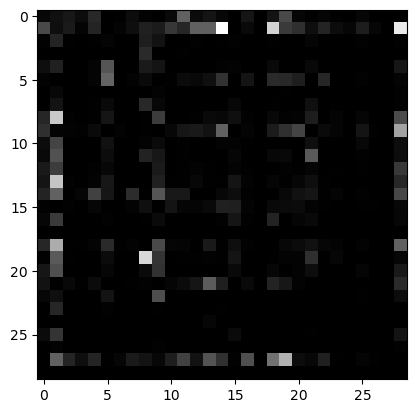

In [222]:
import matplotlib.pyplot as plt
plt.imshow(N, cmap='gray')

In [223]:
allchars

' abcdefghijklmnopqrstuvwxyz#$'

In [224]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last"  # Options: 'last', 'all', 'last_expr'

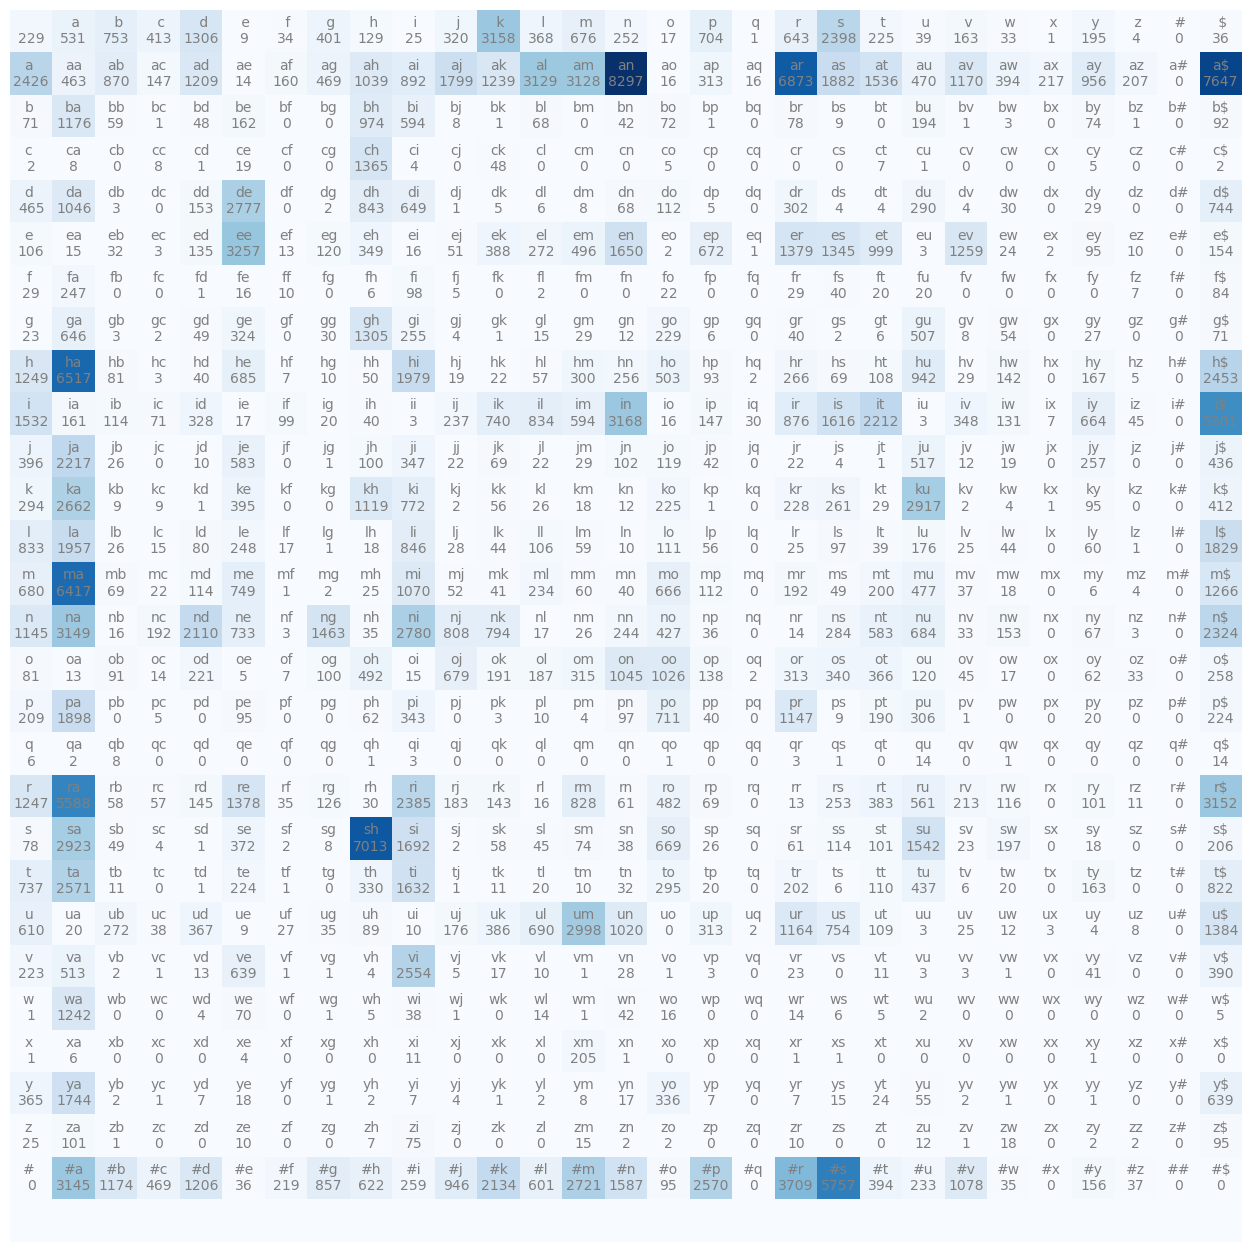

In [225]:
plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(len(allchars)-1):
    for j in range(len(allchars)):
        _ = plt.text(j, i, f'{allchars[i]}{allchars[j]}\n{int(N[i,j].item())}', ha='center', va='center', color='gray')
plt.axis('off')
plt.show()

removing zero row and col 

In [226]:
allchars = '.' + ''.join(sorted(list(set(''.join(names))))) 
allchars
len(allchars)

28

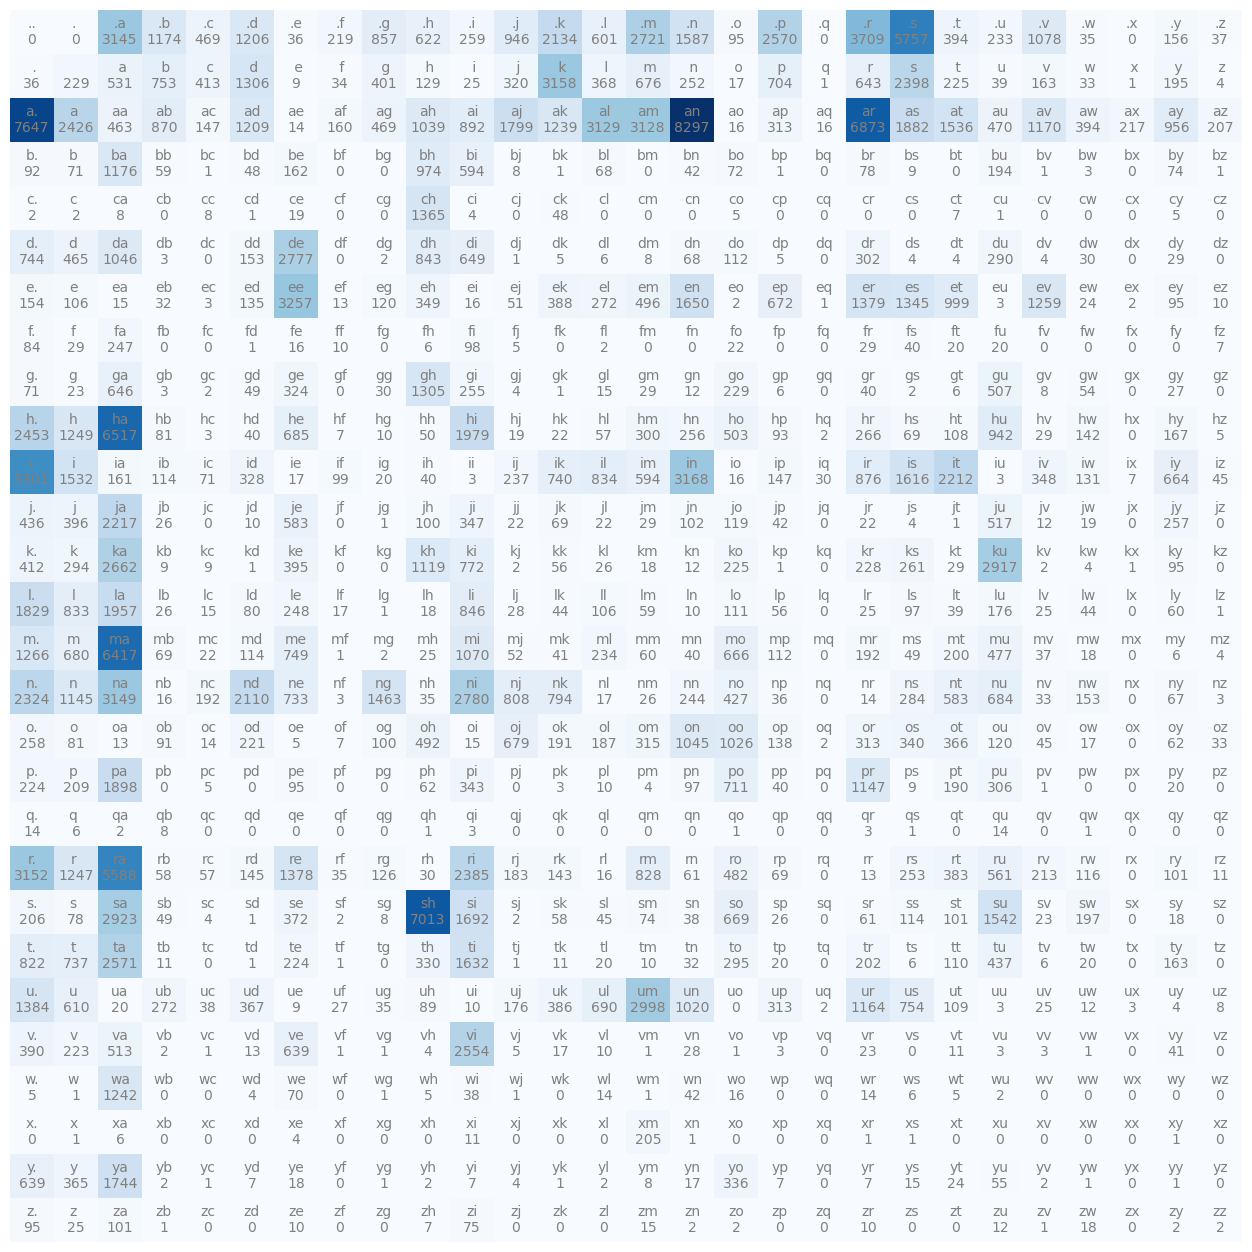

In [227]:
N = torch.zeros(len(allchars), len(allchars))
for word in names:
    word = '.' + word + '.'
    for w1,w2 in zip(word, word[1:]):
        N[allchars.index(w1), allchars.index(w2)] += 1

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(len(allchars)):
    for j in range(len(allchars)):
        _ = plt.text(j, i, f'{allchars[i]}{allchars[j]}\n{int(N[i,j].item())}', ha='center', va='center', color='gray')
plt.axis('off')
plt.show()

In [228]:
starting = N[allchars.index('.')]
starting

tensor([   0.,    0., 3145., 1174.,  469., 1206.,   36.,  219.,  857.,  622.,
         259.,  946., 2134.,  601., 2721., 1587.,   95., 2570.,    0., 3709.,
        5757.,  394.,  233., 1078.,   35.,    0.,  156.,   37.])

In [229]:
starting = starting / starting.sum()
starting

tensor([0.0000, 0.0000, 0.1047, 0.0391, 0.0156, 0.0401, 0.0012, 0.0073, 0.0285,
        0.0207, 0.0086, 0.0315, 0.0710, 0.0200, 0.0906, 0.0528, 0.0032, 0.0856,
        0.0000, 0.1235, 0.1916, 0.0131, 0.0078, 0.0359, 0.0012, 0.0000, 0.0052,
        0.0012])

multinomial = same as providing a probability dist for random function

In [230]:
sampling = torch.zeros_like(starting)
for i in range(100000):
    nxt = np.random.choice(list(allchars), p=starting.numpy())  
    sampling[allchars.index(nxt)] += 1
sampling = sampling / sampling.sum()
sampling

tensor([0.0000, 0.0000, 0.1056, 0.0383, 0.0157, 0.0404, 0.0011, 0.0076, 0.0292,
        0.0210, 0.0089, 0.0313, 0.0713, 0.0193, 0.0901, 0.0516, 0.0033, 0.0856,
        0.0000, 0.1224, 0.1931, 0.0129, 0.0075, 0.0359, 0.0013, 0.0000, 0.0053,
        0.0013])

In [231]:
nxt = torch.multinomial(starting, num_samples=100000, replacement=True)  
nxt


tensor([14, 17,  2,  ...,  2, 12,  2])

In [232]:
sampling = torch.zeros_like(starting)
for i in nxt:
    sampling[i] += 1

sampling = sampling / sampling.sum()
sampling

tensor([0.0000, 0.0000, 0.1037, 0.0388, 0.0158, 0.0396, 0.0012, 0.0070, 0.0285,
        0.0205, 0.0092, 0.0319, 0.0708, 0.0198, 0.0905, 0.0538, 0.0035, 0.0851,
        0.0000, 0.1265, 0.1905, 0.0134, 0.0078, 0.0349, 0.0012, 0.0000, 0.0049,
        0.0010])

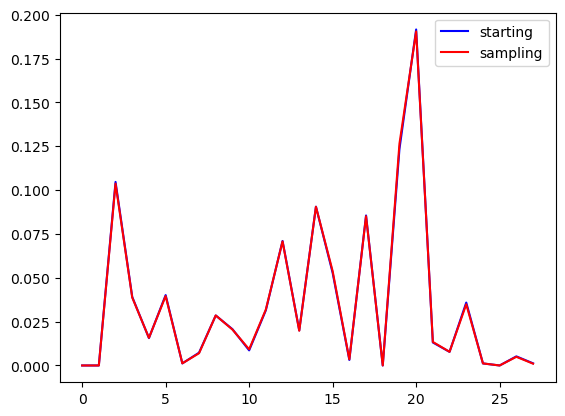

In [233]:
plt.plot(starting.numpy(), label='starting', color='blue')
plt.plot(sampling.numpy(), label='sampling', color='red' )
plt.legend()

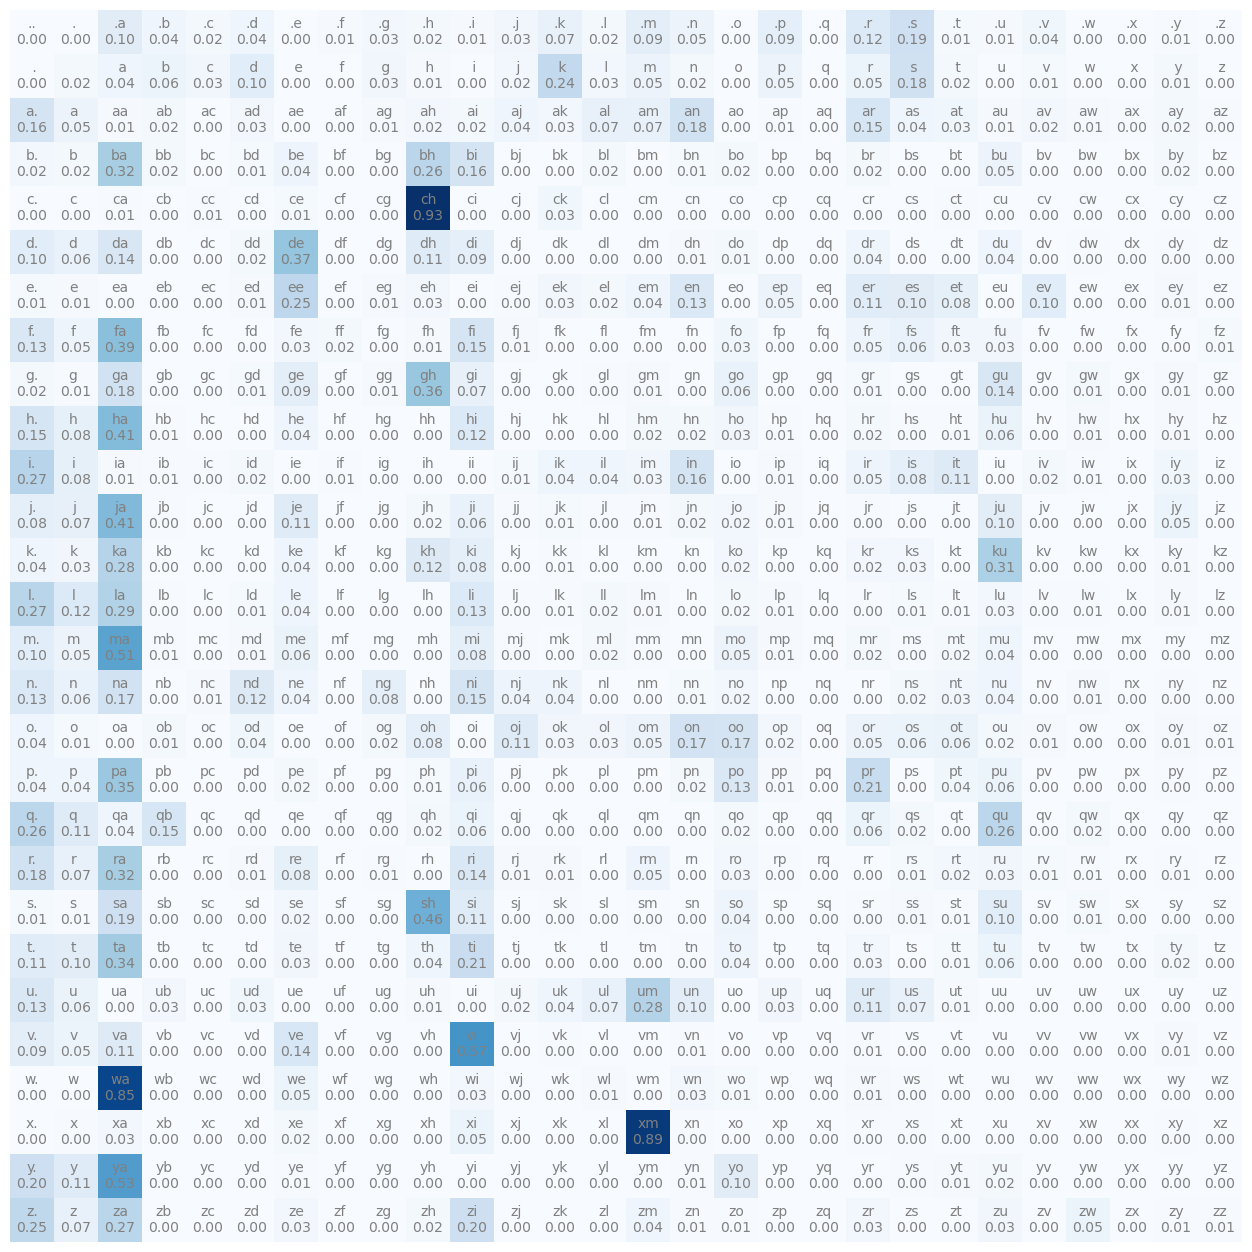

In [251]:
P = N / N.sum(1, keepdim=True)
plt.figure(figsize=(16,16))
plt.imshow(P, cmap='Blues')
for i in range(len(allchars)):
    for j in range(len(allchars)):
        _ = plt.text(j, i, f'{allchars[i]}{allchars[j]}\n{P[i,j].item():.2f}', ha='center', va='center', color='gray')
plt.axis('off')
plt.show()

In [257]:
def generate(P, allchars):
    word = ''
    row = P[allchars.index('.')]
    while True:
        idx = torch.multinomial(row, num_samples=1, replacement=True).item()
        # print(allchars[idx], end=' ')
        word += allchars[idx]
        if allchars[idx] == '.' or len(word) > 50:
            break
        row = P[idx]
    return word

In [276]:
generate(P, allchars)

'shwasind.'

In [284]:
gen_names = []
for i in range(10):
    gen_names.append(generate(P, allchars))
gen_names

['masan.',
 'sham.',
 'potiku deethatr.',
 'gh sa.',
 'samamawarmla.',
 'mb samwaral.',
 'ararindn.',
 'ka.',
 'pari.',
 'pa.']

### names without spaces


In [10]:
import torch  
import matplotlib.pyplot as plt
import numpy as np

In [5]:
names2 = []
for name in names:
    subnames = name.split(' ')
    names2.extend(subnames)
len(names), len(names2)

(30040, 43103)

In [6]:
from collections import Counter

Counter(names).most_common(10)

[('pooja', 384),
 ('jyoti', 209),
 ('sunita', 157),
 ('poonam', 157),
 ('deepak', 150),
 ('neha', 136),
 ('priyanka', 135),
 ('mamta', 129),
 ('rekha', 127),
 ('suman', 125)]

In [7]:
allchars = '.' + ''.join(sorted(list(set(''.join(names2)))))
allchars , len(allchars)

('.abcdefghijklmnopqrstuvwxyz', 27)

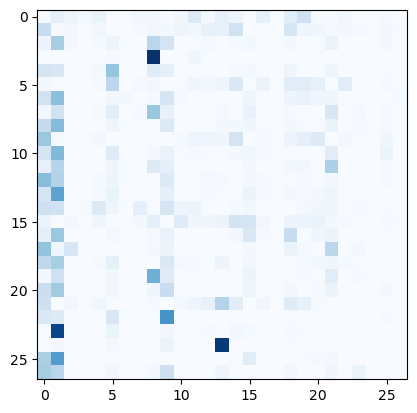

In [11]:
N2 = torch.zeros(len(allchars), len(allchars))
for name in names2:
    name = '.' + name + '.'
    for w1,w2 in zip(name, name[1:]):
        N2[allchars.index(w1), allchars.index(w2)] += 1
P2 = N2 / N2.sum(1, keepdim=True)
plt.imshow(P2, cmap='Blues')

In [13]:
def generate(P, allchars):
    word = ''
    row = P[allchars.index('.')]
    while True:
        idx = torch.multinomial(row, num_samples=1, replacement=True).item()
        word += allchars[idx]
        if allchars[idx] == '.' or len(word) > 50:
            break
        row = P[idx]
    return word

In [14]:
generate(P2, allchars)

'ara.'

In [24]:
for i in range(10):
    print(generate(P2, allchars))

spa.
umeemi.
da.
deprayai.
hrilarara.
a.
jbeepta.
sh.
niwar.
ghanawaumina.


### Loss function

> maximum (log) likelihood estimation

$$
\textrm{L}(x) = \frac{1}{n} \sum_{i = 1}^{n} - log( f(x) )
$$

In [35]:
ln_li = 1
n = 0
for word in names2[:2]:
    for w1,w2 in zip('.'+word, word+'.'):
        bi = allchars.index(w1), allchars.index(w2)
        pr = P2[bi].item()
        log_likeli = - torch.log(P2[bi]).item()
        print(f'{w1}, {w2} : {pr:.3f} -> {log_likeli:.3f}')
        ln_li += log_likeli
        n+=1
f'loss (MLE): {ln_li/n:.3f}'

., b : 0.045 -> 3.108
b, a : 0.315 -> 1.154
a, r : 0.146 -> 1.922
r, j : 0.010 -> 4.568
j, r : 0.004 -> 5.494
r, a : 0.317 -> 1.149
a, j : 0.038 -> 3.262
j, . : 0.155 -> 1.862
., r : 0.101 -> 2.293
r, a : 0.317 -> 1.149
a, m : 0.067 -> 2.709
m, d : 0.009 -> 4.705
d, i : 0.086 -> 2.454
i, n : 0.164 -> 1.810
n, . : 0.191 -> 1.653


'loss (MLE): 2.686'

**Task :**

$$
\max \text{ likelihood } = \max log(\text{likelihood}) = \min -log(\text{ likelihood }) == \min mean (-log(\text{ likelihood }))
$$

minimize loss 
$$
\min_{x} \mathrm{L}(x) = \min_{x} \frac{1}{n} \sum_{i = 1}^{n} - log( f(x) )
$$

In [37]:
ln_li = 1
n = 0
for word in names2:
    for w1,w2 in zip('.'+word, word+'.'):
        bi = allchars.index(w1), allchars.index(w2)
        ln_li += - torch.log(P2[bi]).item()
        n+=1
f'loss (MLE): {ln_li/n:.3f}'

'loss (MLE): 2.191'

#### Add laplace smoothing

(-0.5, 26.5, 26.5, -0.5)

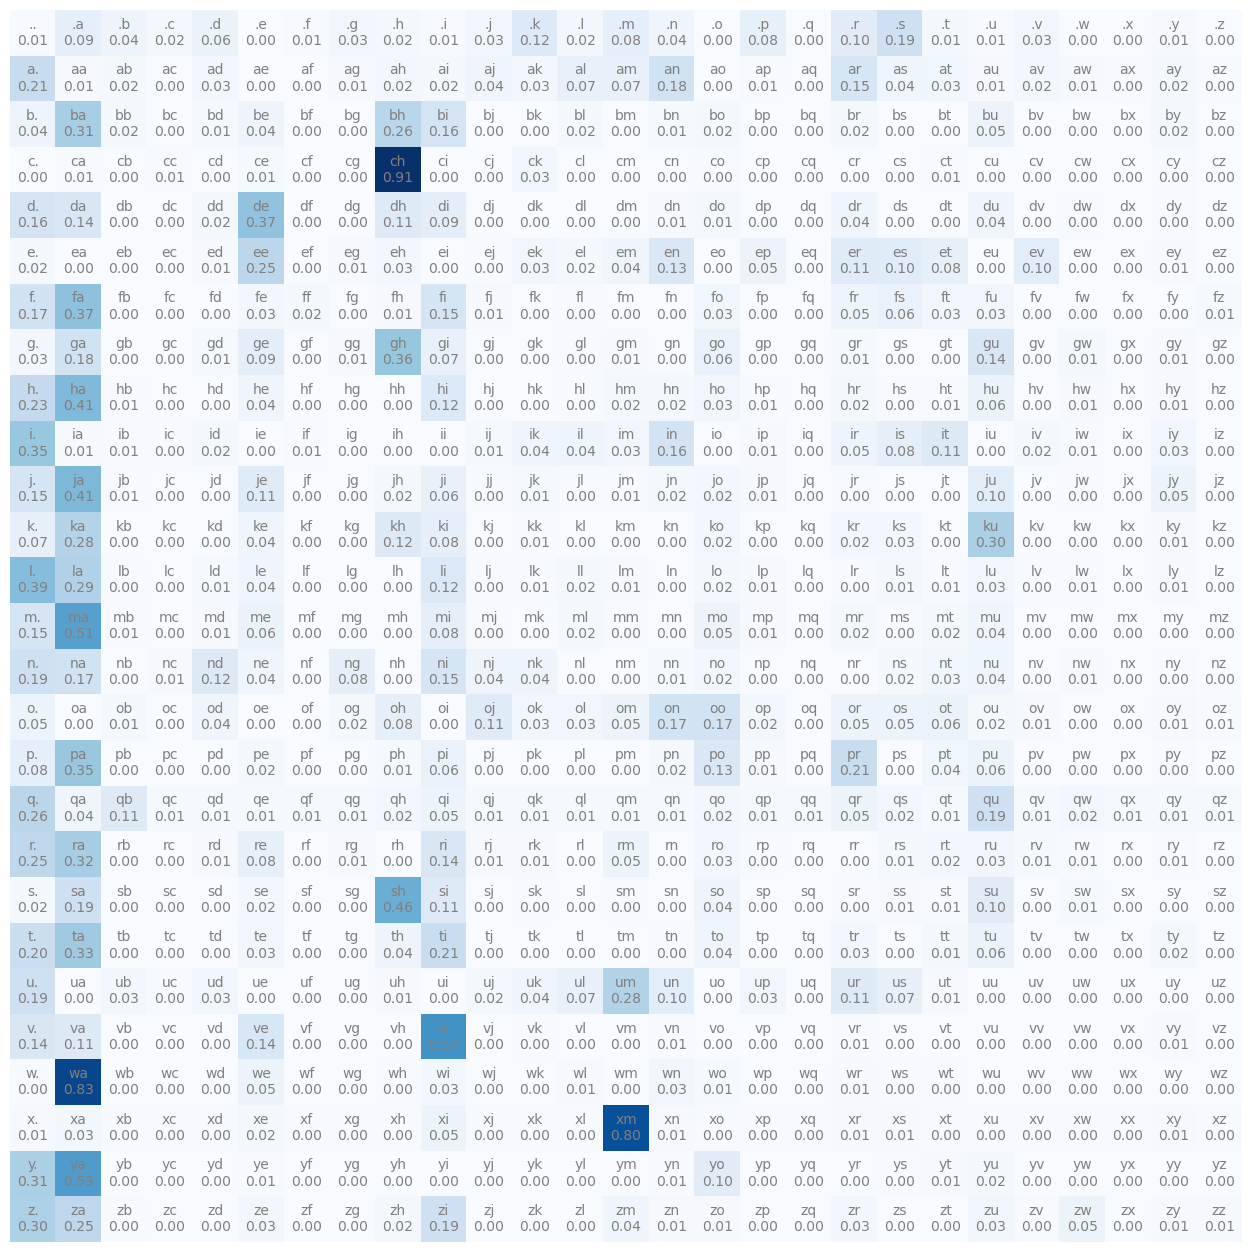

In [39]:
N3 = N2 + 1
P3 = N3 / N3.sum(1, keepdim=True)
plt.figure(figsize=(16,16))
plt.imshow(P3, cmap='Blues')
for i in range(len(allchars)):
    for j in range(len(allchars)):
        _ = plt.text(j, i, f'{allchars[i]}{allchars[j]}\n{P3[i,j].item():.2f}', ha='center', va='center', color='gray')
plt.axis('off')

In [40]:
ln_li = 1
n = 0
for word in names2:
    for w1,w2 in zip('.'+word, word+'.'):
        bi = allchars.index(w1), allchars.index(w2)
        ln_li += - torch.log(P3[bi]).item()
        n+=1
f'loss (MLE): {ln_li/n:.3f}'

'loss (MLE): 2.191'

In [41]:
generate(P3, allchars)

'kumamerpralindevyafish.'

In [43]:
for i in range(10):
    print(generate(P3, allchars))

bumesheta.
sar.
kumar.
uda.
pojesanukurisum.
kumal.
rajkashanilankhitar.
ainitu.
pter.
al.


## introducing Neural Nets

In [48]:
# training set

X_train, y_train = [], []
for w in names2[:1]:
    for w1, w2 in zip('.'+w, w+'.'):
        X_train.append(allchars.index(w1))
        y_train.append(allchars.index(w2))
X_train = torch.tensor(X_train)
y_train = torch.tensor(y_train)
X_train , y_train

(tensor([ 0,  2,  1, 18, 10, 18,  1, 10]),
 tensor([ 2,  1, 18, 10, 18,  1, 10,  0]))

In [53]:
import torch.nn.functional as F 

X_enc = F.one_hot(X_train, num_classes=len(allchars)).float()
X_enc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0

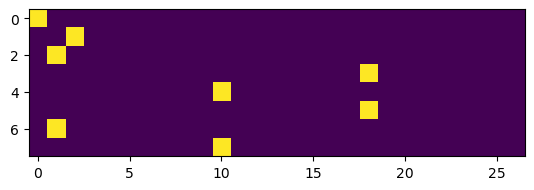

In [54]:
plt.imshow(X_enc)

### Creating neuron

In [56]:
Wts = torch.randn((len(allchars), 1), requires_grad=True)
Wts

tensor([[-0.2946],
        [-0.6098],
        [ 0.4363],
        [ 0.8944],
        [ 1.4007],
        [ 0.0522],
        [-0.6876],
        [ 0.3987],
        [-0.8779],
        [-0.4090],
        [-0.8711],
        [ 1.3957],
        [-0.5860],
        [ 0.2997],
        [ 0.1968],
        [ 1.1639],
        [ 0.1433],
        [ 0.2438],
        [ 0.1642],
        [-0.5239],
        [ 0.2972],
        [-0.1072],
        [ 0.4922],
        [-1.3125],
        [-0.1190],
        [ 0.3640],
        [ 0.5334]], requires_grad=True)

In [58]:
X_activations = X_enc @ Wts
X_activations

tensor([[-0.2946],
        [ 0.4363],
        [-0.6098],
        [ 0.1642],
        [-0.8711],
        [ 0.1642],
        [-0.6098],
        [-0.8711]], grad_fn=<MmBackward0>)

In [59]:
X_activations.shape


torch.Size([8, 1])

In [62]:
Wts = torch.randn((len(allchars), len(allchars)), requires_grad=True)
log_counts = X_enc @ Wts # log_counts also called "logits"
log_counts.shape

torch.Size([8, 27])

In [65]:
log_counts[:2]

tensor([[-0.1078,  1.0400,  0.3939, -0.6039,  0.2050, -0.2697,  0.9881,  2.0921,
         -0.7036,  0.2894,  1.4389,  0.5777, -0.9703, -0.2789,  1.7301,  0.8341,
         -0.6635,  0.8493, -0.6664,  0.0610,  1.1740, -0.2032,  1.0243, -0.8191,
          0.4210,  0.0549,  0.3476],
        [-1.1681,  0.4042, -1.6656, -1.1560,  1.0246,  0.6243,  0.9492,  1.2972,
         -0.4405,  0.4004, -0.4088, -0.5181, -1.7285, -0.6343,  2.5571,  0.5507,
          2.1085,  0.2890, -0.9959,  1.2268, -0.4778, -0.9589, -1.2647,  0.2638,
         -0.4837,  1.9169, -1.9873]], grad_fn=<SliceBackward0>)

In [63]:
counts = torch.exp(log_counts)
counts.shape

torch.Size([8, 27])

In [66]:
counts[:2]

tensor([[ 0.8978,  2.8293,  1.4828,  0.5467,  1.2275,  0.7636,  2.6861,  8.1017,
          0.4948,  1.3356,  4.2161,  1.7820,  0.3790,  0.7566,  5.6412,  2.3027,
          0.5150,  2.3380,  0.5136,  1.0629,  3.2351,  0.8161,  2.7852,  0.4408,
          1.5235,  1.0564,  1.4156],
        [ 0.3109,  1.4981,  0.1891,  0.3147,  2.7859,  1.8670,  2.5836,  3.6589,
          0.6437,  1.4924,  0.6644,  0.5957,  0.1776,  0.5303, 12.8984,  1.7344,
          8.2355,  1.3351,  0.3694,  3.4104,  0.6201,  0.3833,  0.2823,  1.3019,
          0.6165,  6.7996,  0.1371]], grad_fn=<SliceBackward0>)

In [67]:
P = counts / counts.sum(1, keepdim=True)
P.shape

torch.Size([8, 27])

In [68]:
P[:2]

tensor([[0.0176, 0.0553, 0.0290, 0.0107, 0.0240, 0.0149, 0.0525, 0.1584, 0.0097,
         0.0261, 0.0824, 0.0348, 0.0074, 0.0148, 0.1103, 0.0450, 0.0101, 0.0457,
         0.0100, 0.0208, 0.0633, 0.0160, 0.0545, 0.0086, 0.0298, 0.0207, 0.0277],
        [0.0056, 0.0270, 0.0034, 0.0057, 0.0503, 0.0337, 0.0466, 0.0660, 0.0116,
         0.0269, 0.0120, 0.0107, 0.0032, 0.0096, 0.2327, 0.0313, 0.1486, 0.0241,
         0.0067, 0.0615, 0.0112, 0.0069, 0.0051, 0.0235, 0.0111, 0.1227, 0.0025]],
       grad_fn=<SliceBackward0>)

##### for all train data

In [88]:
X_train, y_train = [], []
for w in names2:
    for w1, w2 in zip('.'+w, w+'.'):
        X_train.append(allchars.index(w1))
        y_train.append(allchars.index(w2))
X_train = torch.tensor(X_train)
y_train = torch.tensor(y_train)

##### Forward Pass

In [ ]:
W = torch.randn((len(allchars), len(allchars)), requires_grad=True)
X_enc = F.one_hot(X_train, num_classes=len(allchars)).float()
logits = X_enc @ W
logits.shape

torch.Size([280329, 27])

**Softmax**
$$
\text{softmax} = [ \frac{e^{z_i}}{\sum_{j = 1}^{K}e^{z_j}} \quad \forall i \in K]
$$

In [90]:
# cts = logits.exp()
# P = cts / cts.sum(1, keepdim=True)
# P.shape

P = torch.softmax(logits, dim=1)
P.shape

torch.Size([280329, 27])

In [91]:
loss = - P[torch.arange(len(X_train)), y_train].log().mean()
loss

tensor(3.8290, grad_fn=<NegBackward0>)

##### Backward pass

In [92]:
W.grad = None
W.retain_grad()
loss.backward()

update weights

In [93]:
alpha = 1e-1
W = W - alpha * W.grad

In [94]:
# forward pass
logits = X_enc @ W
P = torch.softmax(logits, dim=1)
loss = - P[torch.arange(len(X_train)), y_train].log().mean()
loss

tensor(3.8279, grad_fn=<NegBackward0>)

##### L2 Regularization 

In [123]:
l2 = (W ** 2).sum()
l2

tensor(824.6472, grad_fn=<SumBackward0>)

In [124]:
#forward with l2
loss = - P[torch.arange(len(X_train)), y_train].log().mean() + 1e-4 * l2

### SGD with NN

In [103]:
X_train, y_train = [], []
for w in names2:
    for w1, w2 in zip('.'+w, w+'.'):
        X_train.append(allchars.index(w1))
        y_train.append(allchars.index(w2))
X_train = torch.tensor(X_train)
y_train = torch.tensor(y_train)

W = torch.randn((len(allchars), len(allchars)), requires_grad=True)
X_enc = F.one_hot(X_train, num_classes=len(allchars)).float()

In [112]:
max_iters = 10000
alpha = 1
for i in range(max_iters):
    logits = X_enc @ W
    P = torch.softmax(logits, dim=1)
    loss = - P[torch.arange(len(X_train)), y_train].log().mean()
    if i % 1000 == 0:
        print(f'iter {i} loss {loss.item()}')
    W.grad = None
    W.retain_grad()
    loss.backward()

    alpha = alpha*0.99

    W = W - alpha * W.grad 

iter 0 loss 2.376432180404663
iter 1000 loss 2.3468871116638184
iter 2000 loss 2.346886396408081
iter 3000 loss 2.346886396408081
iter 4000 loss 2.346886396408081
iter 5000 loss 2.346886396408081
iter 6000 loss 2.346886396408081
iter 7000 loss 2.346886396408081
iter 8000 loss 2.346886396408081
iter 9000 loss 2.346886396408081


##### with L2

In [126]:
X_train, y_train = [], []
for w in names2:
    for w1, w2 in zip('.'+w, w+'.'):
        X_train.append(allchars.index(w1))
        y_train.append(allchars.index(w2))
X_train = torch.tensor(X_train)
y_train = torch.tensor(y_train)

W = torch.randn((len(allchars), len(allchars)), requires_grad=True)
X_enc = F.one_hot(X_train, num_classes=len(allchars)).float()

In [128]:
max_iters = 10000
alpha = 5
for i in range(max_iters):
    logits = X_enc @ W
    P = torch.softmax(logits, dim=1)
    loss = - P[torch.arange(len(X_train)), y_train].log().mean() + 1e-4 * (W ** 2).sum()
    if i % 1000 == 0:
        print(f'iter {i} loss {loss.item()}')
    W.grad = None
    W.retain_grad()
    loss.backward()

    alpha = alpha*0.99

    W = W - alpha * W.grad 

iter 0 loss 3.084088087081909
iter 1000 loss 2.4521865844726562
iter 2000 loss 2.452180862426758
iter 3000 loss 2.452180862426758
iter 4000 loss 2.452180862426758
iter 5000 loss 2.452180862426758
iter 6000 loss 2.452180862426758
iter 7000 loss 2.452180862426758
iter 8000 loss 2.452180862426758
iter 9000 loss 2.452180862426758


##### Comparing

In [113]:
# Bigram loss = 2.19
# NN bigram loss = 2.3468

loss (MLE): 2.191


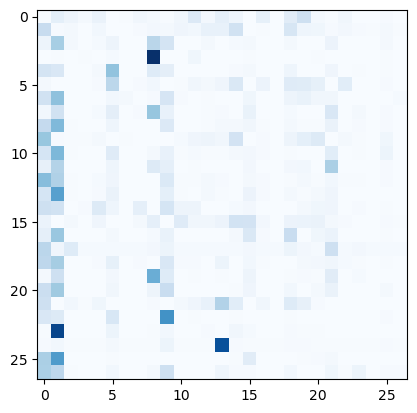

In [129]:
ln_li = 1
n = 0
for word in names2:
    for w1,w2 in zip('.'+word, word+'.'):
        bi = allchars.index(w1), allchars.index(w2)
        ln_li += - torch.log(P3[bi]).item()
        n+=1
print(f'loss (MLE): {ln_li/n:.3f}')
plt.imshow(P3, cmap='Blues') 

2.3865609169006348


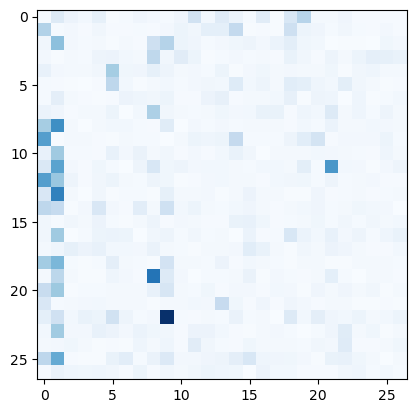

In [130]:
loss = - P[torch.arange(len(X_train)), y_train].log().mean()
print(loss.item())
plt.imshow(W.exp().detach().numpy(), cmap='Blues')

In [ ]:
def generate_new(W, allchars):
    word = ''
    idx = allchars.index('.')
    while True:
        x_enc = F.one_hot(torch.tensor(idx), num_classes=len(allchars)).float()
        logits = x_enc @ W
        cts = logits.exp()
        p = cts / cts.sum()
        idx = torch.multinomial(p.squeeze(), num_samples=1, replacement=True).item()
        word += allchars[idx]
        if allchars[idx] == '.' or len(word) > 50:
            break
    return word

generate_new(W, allchars)

'kidma.'

In [136]:
for i in range(10):
    print(generate_new(W, allchars))

deesha.
sumba.
dfmj.
k.
nginqhxheeeeugn.
dei.
rpran.
ama.
china.
mt.
